# VGG16を用いた画像認識

# 1

## 1.1 Import Libraty

In [2]:
import torch as torch
import torchvision
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook
from torchsummary import summary
from pylab import rcParams

## 1.2 Pre-work for imange and Define the transformation

In [3]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(), 
    ])

## 1.3 Load Images from Dataset

In [4]:
train_dataset = torchvision.datasets.CIFAR10(root='./dataset/',
                                             train=True, #訓練データをロード
                                             transform=transform,#上で定義した変換を適用
                                             download=False)
test_dataset = torchvision.datasets.CIFAR10(root='./dataset/',
                                             train=False, #検証データをロード
                                             transform=transforms.ToTensor(),
                                             download=False)

## 1.4 Define the function of the visualization for checking

In [6]:
%matplotlib inline
def show(img):
    npimg = img.numpy() 
    plt.grid(False) 
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

## 1.5 Visualize Dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./dataset/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
学習画像サイス torch.Size([3, 32, 32])
ラベル 9


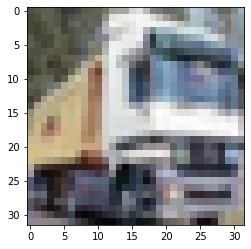

In [10]:
print (train_dataset)
image, label = train_dataset[1]
print("学習画像サイス",image.size())
print("ラベル",label)
show(image)

## 1.6 Change Dataset to mini-batch unit

In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, #64 images per batch
                                           shuffle=True,
                                           num_workers=4) # Load data 4 process
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=64,
                                          shuffle=False,
                                          num_workers=4)

# 2 Model definition

In [13]:
class myVGG(nn.Module):
    
    def __init__(self):
        super(myVGG, self).__init__()
        
        self.conv01 = nn.Conv2d(3, 64, 3)
        self.conv02 = nn.Conv2d(64, 64, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv03 = nn.Conv2d(64, 128, 3)
        self.conv04 = nn.Conv2d(128, 128, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.conv05 = nn.Conv2d(128, 256, 3)
        self.conv06 = nn.Conv2d(256, 256, 3)
        self.conv07 = nn.Conv2d(256, 256, 3)
        self.pool3 = nn.MaxPool2d(2, 2)
        
        self.conv08 = nn.Conv2d(256, 512, 3)
        self.conv09 = nn.Conv2d(512, 512, 3)
        self.conv10 = nn.Conv2d(512, 512, 3)
        self.pool4 = nn.MaxPool2d(2, 2)
        
        self.conv11 = nn.Conv2d(512, 512, 3)
        self.conv12 = nn.Conv2d(512, 512, 3)
        self.conv13 = nn.Conv2d(512, 512, 3)
        self.pool5 = nn.MaxPool2d(2, 2)
        
        self.avepool1 = nn.AdaptiveAvgPool2d((7, 7))
        
        self.fc1 = nn.Linear(512 * 7 * 7, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 5)
        
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        
        
    def forward(self, x):
        x = F.relu(self.conv01(x))
        x = F.relu(self.conv02(x))
        x = self.pool1(x)
        
        x = F.relu(self.conv03(x))
        x = F.relu(self.conv04(x))
        x = self.pool2(x)
        
        x = F.relu(self.conv05(x))
        x = F.relu(self.conv06(x))
        x = F.relu(self.conv07(x))
        x = self.pool3(x)
 
        x = F.relu(self.conv08(x))
        x = F.relu(self.conv09(x))
        x = F.relu(self.conv10(x))
        x = self.pool4(x)
        
        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x = F.relu(self.conv13(x))
        x = self.pool5(x)        
        
        x = self.avepool1(x)
        
        x = x.view(-1, 512 * 7 *7)
        
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return x

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = myVGG().to(device)
print(net)

myVGG(
  (conv01): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv02): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv03): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv04): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv05): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv06): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv07): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv08): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv09): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv11): Con

In [22]:
summary(net, input_size=(3,32,32))

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 3, 3, 3], but got 5-dimensional input of size [2, 3, 64, 32, 32] instead

# 3 Leaning

In [28]:
net.train()

myVGG(
  (conv01): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv02): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv03): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv04): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv05): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv06): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv07): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv08): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv09): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv11): Con

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.00001)

# 4

# 5

# 6

# 7